# Lending Club Data - Predicting Loan Defaults

In [461]:
# importing necessary modules
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [462]:
# load data
df = pd.read_csv("../../../Documents/loan.csv", index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [463]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Wrangling

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 73 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan  

In [465]:
# removing months from term
df.term = df.term.str.replace(' months', '')

In [466]:
df.term.head()

id
1077501     36
1077430     60
1077175     36
1076863     36
1075358     60
Name: term, dtype: object

In [467]:
# changing into int type
df.term = df.term.astype(int)

In [468]:
df.grade.value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [469]:
# changing into numerical data type
df.grade.replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], range(1,8), inplace=True)
df.grade.value_counts()

2    254535
3    245860
1    148202
4    139542
5     70705
6     23046
7      5489
Name: grade, dtype: int64

In [470]:
# changing into categorical type
df.grade = df.grade.astype('category')

In [471]:
df.sub_grade.value_counts()

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64

In [472]:
# changing into numerical data type
df.sub_grade.replace(['A1','A2','A3','A4','A5',
                      'B1','B2','B3','B4','B5',
                      'C1','C2','C3','C4','C5',
                      'D1','D2','D3','D4','D5',
                      'E1','E2','E3','E4','E5',
                      'F1','F2','F3','F4','F5',
                      'G1','G2','G3','G4','G5'],
                     range(1,36), inplace=True)

# changing into categorical type
df.sub_grade = df.sub_grade.astype('category')

In [473]:
df.sub_grade.value_counts()

8     56323
9     55626
11    53387
12    52236
13    50161
14    48857
10    48833
7     48781
6     44972
5     44816
15    41219
16    36238
4     34531
17    29803
18    26554
19    25558
3     23457
1     22913
2     22485
20    21389
21    18268
22    17004
23    14134
24    11724
25     9575
26     7218
27     5392
28     4433
29     3409
30     2594
31     1871
32     1398
33      981
34      663
35      576
Name: sub_grade, dtype: int64

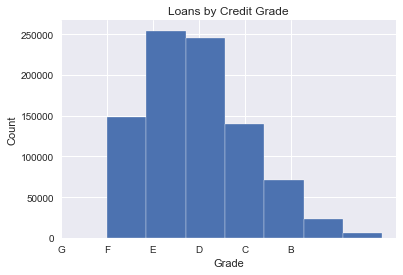

In [474]:
sns.set()
df.grade.hist(bins=7, edgecolor='w')
plt.xticks(range(0,6), ['G','F','E','D','C','B','A'])
plt.title('Loans by Credit Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [475]:
df.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [476]:
df.emp_length.replace(['10+ years', '2 years', '< 1 year', '3 years', '1 year',
                      '5 years', '4 years', 'n/a', '7 years', '8 years', '6 years', '9 years'], 
                      [10, 2, 0, 3, 1, 5, 4, 0, 7, 8, 6, 9], inplace=True)

In [477]:
df.emp_length = df.emp_length.astype('category')
df.emp_length.value_counts()

10    291569
0     115430
2      78870
3      70026
1      57095
5      55704
4      52529
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

In [478]:
df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [479]:
df.home_ownership.replace(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], [3,2,1,0,0,0], inplace=True)
df.home_ownership = df.home_ownership.astype('category')

In [480]:
df.home_ownership.value_counts()

2    443557
1    356117
3     87470
0       235
Name: home_ownership, dtype: int64

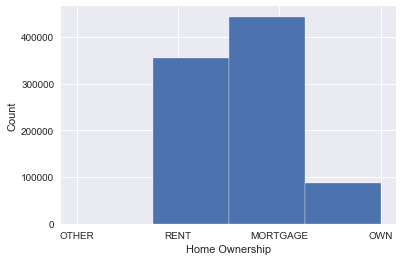

In [481]:
sns.set()
df.home_ownership.hist(bins=4, edgecolor='w')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks([0,1,2,3], ['OTHER','RENT','MORTGAGE','OWN'])
plt.show()

In [482]:
df.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [483]:
df.verification_status.replace(['Source Verified', 'Verified', 'Not Verified'], [1,1,0], inplace=True)
df.verification_status = df.verification_status.astype('category')

In [484]:
df.verification_status.value_counts()

1    620629
0    266750
Name: verification_status, dtype: int64

In [485]:
df.issue_d = pd.to_datetime(df.issue_d)

In [486]:
df.issue_d.head()

id
1077501   2011-12-01
1077430   2011-12-01
1077175   2011-12-01
1076863   2011-12-01
1075358   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [487]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [488]:
# selecting and encoding fully paid and defaulted loans only
df.loan_status.replace(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 
                        'Default', 'Does not meet the credit policy. Status:Charged Off'], [0, 0, 1, 1, 1],
                       inplace=True)

In [489]:
# dropping loans that are still active and not mature yet
df = df.loc[df['loan_status'].isin([0, 1])]

In [490]:
df.loan_status = df.loan_status.astype('category')
df.loan_status.value_counts()

0    209711
1     47228
Name: loan_status, dtype: int64

**Created two classes:**
* 0: Paid in Full
* 1: Defaulted

In [491]:
df.pymnt_plan.value_counts()

n    256937
y         2
Name: pymnt_plan, dtype: int64

In [492]:
df.pymnt_plan.replace(['n', 'y'], [0, 1], inplace=True)
df.pymnt_plan = df.pymnt_plan.astype('category')
df.pymnt_plan.value_counts()

0    256937
1         2
Name: pymnt_plan, dtype: int64

In [493]:
# dropping columns that are not useful
df = df.drop(['url', 'initial_list_status', 'last_credit_pull_d', 'policy_code', 'zip_code', 'addr_state'], axis=1)

In [494]:
df = df.drop(['issue_d'], axis=1)

In [495]:
df = df.drop(['title', 'desc'], axis=1)

In [496]:
df = df.drop(['emp_title', 'next_pymnt_d', 'last_pymnt_d', 'annual_inc_joint', 'dti_joint',
              'verification_status_joint'], axis=1)

In [497]:
df = df.drop(['member_id'], axis=1)

In [498]:
df.purpose.value_counts()

debt_consolidation    150253
credit_card            50649
home_improvement       15190
other                  14766
major_purchase          6402
small_business          4926
car                     3720
medical                 2927
moving                  2085
wedding                 2011
house                   1703
vacation                1615
educational              422
renewable_energy         270
Name: purpose, dtype: int64

In [499]:
df = df.drop(['purpose', 'application_type'], axis=1)

In [500]:
df.earliest_cr_line.head()

id
1077501    Jan-1985
1077430    Apr-1999
1077175    Nov-2001
1076863    Feb-1996
1075269    Nov-2004
Name: earliest_cr_line, dtype: object

In [501]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256939 entries, 1077501 to 36260758
Data columns (total 55 columns):
loan_amnt                      256939 non-null float64
funded_amnt                    256939 non-null float64
funded_amnt_inv                256939 non-null float64
term                           256939 non-null int64
int_rate                       256939 non-null float64
installment                    256939 non-null float64
grade                          256939 non-null category
sub_grade                      256939 non-null category
emp_length                     256939 non-null category
home_ownership                 256939 non-null category
annual_inc                     256935 non-null float64
verification_status            256939 non-null category
loan_status                    256939 non-null category
pymnt_plan                     256939 non-null category
dti                            256939 non-null float64
delinq_2yrs                    256910 non-null floa

In [503]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36,10.65,162.87,2,7,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,2500.0,2500.0,2500.0,60,15.27,59.83,3,14,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,2400.0,2400.0,2400.0,36,15.96,84.33,3,15,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,10000.0,10000.0,10000.0,36,13.49,339.31,3,11,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075269,5000.0,5000.0,5000.0,36,7.90,156.46,1,4,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
sum(df.loan_amnt != df.funded_amnt)

1914

In [505]:
sum(df.funded_amnt != df.funded_amnt_inv)

46553

In [506]:
sum(df.funded_amnt - df.funded_amnt_inv)

30665038.139082015

In [507]:
sum(df.loan_amnt - df.funded_amnt)

10822350.0

In [508]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,256939.000000,256939.000000,256939.000000,256939.000000,256939.000000,256939.000000,2.569350e+05,256939.000000,256910.000000,256910.000000,...,144.000000,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000
mean,13522.115950,13479.995641,13360.648099,41.336177,13.780014,416.923016,7.249885e+04,16.534986,0.250411,0.887821,...,36462.312500,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000
std,8128.811481,8106.456843,8141.904114,9.979672,4.389704,244.878760,5.890043e+04,7.793541,0.742431,1.158745,...,38137.563875,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067
min,500.000000,500.000000,0.000000,36.000000,5.320000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000
25%,7200.000000,7200.000000,7100.000000,36.000000,10.740000,238.130000,4.500000e+04,10.740000,0.000000,0.000000,...,10763.750000,63.350000,0.000000,2.000000,2091.250000,46.825000,1.330000e+04,0.000000,0.000000,1.000000
50%,12000.000000,12000.000000,11950.000000,36.000000,13.550000,364.290000,6.200000e+04,16.200000,0.000000,1.000000,...,23605.000000,77.050000,1.000000,3.000000,4511.500000,61.950000,2.230000e+04,1.000000,0.000000,2.000000
75%,18200.000000,18000.000000,18000.000000,36.000000,16.550000,546.430000,8.700000e+04,21.990000,0.000000,1.000000,...,50835.750000,88.250000,2.000000,5.000000,8212.750000,74.225000,3.680000e+04,1.000000,2.000000,4.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,33.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


In [509]:
df = df.drop(['loan_amnt', 'funded_amnt_inv'], axis=1)

In [510]:
# inspecting missing values of annual income column
df.annual_inc.describe()

count    2.569350e+05
mean     7.249885e+04
std      5.890043e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [511]:
df.annual_inc.head()

id
1077501    24000.0
1077430    30000.0
1077175    12252.0
1076863    49200.0
1075269    36000.0
Name: annual_inc, dtype: float64

In [512]:
df.annual_inc.median()

62000.0

In [513]:
# filling in annula income null values w median
df.annual_inc.fillna(df.annual_inc.median(), inplace=True)

In [514]:
# inspecting missing values
df.delinq_2yrs.describe()

count    256910.000000
mean          0.250411
std           0.742431
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [515]:
df.delinq_2yrs.head()

id
1077501    0.0
1077430    0.0
1077175    0.0
1076863    0.0
1075269    0.0
Name: delinq_2yrs, dtype: float64

In [516]:
df.earliest_cr_line.describe()

count                  256910
unique                    646
top       2000-10-01 00:00:00
freq                     2143
first     1946-01-01 00:00:00
last      2012-10-01 00:00:00
Name: earliest_cr_line, dtype: object

In [517]:
# filling values with most frequent time stamp
df.earliest_cr_line = df.earliest_cr_line.fillna('2000-10-01 00:00:00')

In [518]:
df.mths_since_last_delinq.describe()

count    114294.000000
mean         35.059259
std          21.861345
min           0.000000
25%          17.000000
50%          32.000000
75%          51.000000
max         152.000000
Name: mths_since_last_delinq, dtype: float64

In [519]:
df.mths_since_last_delinq.head()

id
1077501     NaN
1077430     NaN
1077175     NaN
1076863    35.0
1075269     NaN
Name: mths_since_last_delinq, dtype: float64

In [520]:
# filling null values with 0
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(0)

In [521]:
# filling null values with 0
df.mths_since_last_record = df.mths_since_last_record.fillna(0)

In [522]:
# filling null values with 0
df.collections_12_mths_ex_med = df.collections_12_mths_ex_med.fillna(0)

In [523]:
# filling null values with 0
df.mths_since_last_major_derog = df.mths_since_last_major_derog.fillna(0)

In [524]:
df.tot_coll_amt = df.tot_coll_amt.fillna(0)

In [525]:
df.tot_cur_bal.describe()

count    1.904640e+05
mean     1.381605e+05
std      1.523284e+05
min      0.000000e+00
25%      2.835575e+04
50%      8.076050e+04
75%      2.079905e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [526]:
df.tot_cur_bal.median()

80760.5

In [527]:
df.tot_cur_bal.mean()

138160.4572937668

In [528]:
(df.tot_cur_bal == 0).sum()

50

In [529]:
df.tot_cur_bal = df.tot_cur_bal.fillna(0)

In [530]:
df.open_acc_6m = df.open_acc_6m.fillna(0)
df.open_il_6m = df.open_il_6m.fillna(0)
df.open_il_12m = df.open_il_12m.fillna(0)
df.open_il_24m = df.open_il_24m.fillna(0)

In [531]:
df.total_rev_hi_lim.describe()

count    1.904640e+05
mean     2.969485e+04
std      2.949980e+04
min      0.000000e+00
25%      1.330000e+04
50%      2.230000e+04
75%      3.680000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

In [532]:
(df.total_rev_hi_lim == 0).sum()

87

In [533]:
df.total_rev_hi_lim = df.total_rev_hi_lim.fillna(0)

In [534]:
df.mths_since_rcnt_il = df.mths_since_rcnt_il.fillna(0)
df.total_bal_il = df.total_bal_il.fillna(0)
df.il_util = df.il_util.fillna(0)
df.open_rv_12m = df.open_rv_12m.fillna(0)
df.open_rv_24m = df.open_rv_24m.fillna(0)
df.max_bal_bc = df.max_bal_bc.fillna(0)
df.all_util = df.all_util.fillna(0)
df.inq_fi = df.inq_fi.fillna(0)
df.total_cu_tl = df.total_cu_tl.fillna(0)
df.inq_last_12m = df.inq_last_12m.fillna(0)

In [535]:
df.delinq_2yrs = df.delinq_2yrs.fillna(0)
df.inq_last_6mths = df.inq_last_6mths.fillna(0)
df.open_acc = df.open_acc.fillna(0)
df.pub_rec = df.pub_rec.fillna(0)
df.total_acc = df.total_acc.fillna(0)
df.acc_now_delinq = df.acc_now_delinq.fillna(0)

In [536]:
df.earliest_cr_line.describe()

count                  256939
unique                    647
top       2000-10-01 00:00:00
freq                     2143
Name: earliest_cr_line, dtype: object

In [537]:
df.earliest_cr_line.head()

id
1077501    1985-01-01 00:00:00
1077430    1999-04-01 00:00:00
1077175    2001-11-01 00:00:00
1076863    1996-02-01 00:00:00
1075269    2004-11-01 00:00:00
Name: earliest_cr_line, dtype: object

In [538]:
 df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line).astype('int')

In [539]:
df.earliest_cr_line.head()

id
1077501     473385600000000000
1077430     922924800000000000
1077175    1004572800000000000
1076863     823132800000000000
1075269    1099267200000000000
Name: earliest_cr_line, dtype: int64

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256939 entries, 1077501 to 36260758
Data columns (total 53 columns):
funded_amnt                    256939 non-null float64
term                           256939 non-null int64
int_rate                       256939 non-null float64
installment                    256939 non-null float64
grade                          256939 non-null category
sub_grade                      256939 non-null category
emp_length                     256939 non-null category
home_ownership                 256939 non-null category
annual_inc                     256939 non-null float64
verification_status            256939 non-null category
loan_status                    256939 non-null category
pymnt_plan                     256939 non-null category
dti                            256939 non-null float64
delinq_2yrs                    256939 non-null float64
earliest_cr_line               256939 non-null int64
inq_last_6mths                 256939 non-null float6

In [541]:
df.iloc[:, 10:20].head()

,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec
id,,,,,,,,,,
1077501,0,0,27.65,0.0,473385600000000000,1.0,0.0,0.0,3.0,0.0
1077430,1,0,1.00,0.0,922924800000000000,5.0,0.0,0.0,3.0,0.0
1077175,0,0,8.72,0.0,1004572800000000000,2.0,0.0,0.0,2.0,0.0
1076863,0,0,20.00,0.0,823132800000000000,1.0,35.0,0.0,10.0,0.0
1075269,0,0,11.20,0.0,1099267200000000000,3.0,0.0,0.0,9.0,0.0


In [542]:
df.iloc[:, 21:30].head()

,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
id,,,,,,,,,
1077501,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00
1077430,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00
1077175,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00
1076863,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97
1075269,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00


In [543]:
df.iloc[:, 31:40].head()

,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m
id,,,,,,,,,
1077501,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077430,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077175,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076863,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075269,0.00,161.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [544]:
df.iloc[:, 41:-1].head()

,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl
id,,,,,,,,,,,
1077501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256939 entries, 1077501 to 36260758
Data columns (total 53 columns):
funded_amnt                    256939 non-null float64
term                           256939 non-null int64
int_rate                       256939 non-null float64
installment                    256939 non-null float64
grade                          256939 non-null category
sub_grade                      256939 non-null category
emp_length                     256939 non-null category
home_ownership                 256939 non-null category
annual_inc                     256939 non-null float64
verification_status            256939 non-null category
loan_status                    256939 non-null category
pymnt_plan                     256939 non-null category
dti                            256939 non-null float64
delinq_2yrs                    256939 non-null float64
earliest_cr_line               256939 non-null int64
inq_last_6mths                 256939 non-null float6

In [546]:
df.isnull().sum()

funded_amnt                      0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
pymnt_plan                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     240
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int       

In [547]:
df.revol_util.describe()

count    256699.000000
mean         54.315684
std          24.827559
min           0.000000
25%          36.200000
50%          55.800000
75%          73.900000
max         892.300000
Name: revol_util, dtype: float64

In [548]:
# filling missing values with median values
df.revol_util = df.revol_util.fillna(55.80)

In [549]:
df.revol_util.describe()

count    256939.000000
mean         54.317071
std          24.816002
min           0.000000
25%          36.200000
50%          55.800000
75%          73.900000
max         892.300000
Name: revol_util, dtype: float64

In [550]:
df.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
pymnt_plan                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

### EDA

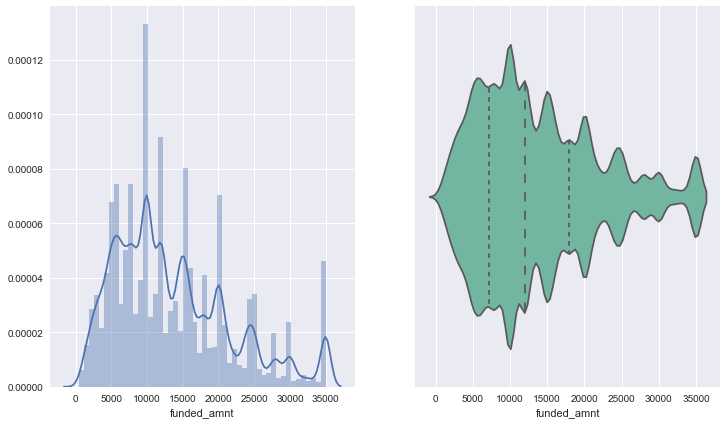

In [551]:
#I will start looking the funded_amnt column

fig, ax=plt.subplots(1,2,figsize=(12,7))

sns.distplot(df['funded_amnt'],ax=ax[0])
sns.violinplot(x='funded_amnt', data=df, ax=ax[1], 
               inner="quartile", palette="Set2")

plt.show()

### Model Building

In [552]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

# setting up predictor variables
X = df.drop('loan_status', axis=1)

# setting up labels
y = df.loan_status

In [553]:
# spliting our data into training and test tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

#### Random Forest Classifier

In [554]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

In [555]:
# Compute and print the confusion matrix and classification report
accuracy = rf.score(X_test, y_test)
print('Accuracy Score', accuracy)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy Score 0.996414671541
[[69223     5]
 [  299 15263]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     69228
          1       1.00      0.98      0.99     15562

avg / total       1.00      1.00      1.00     84790



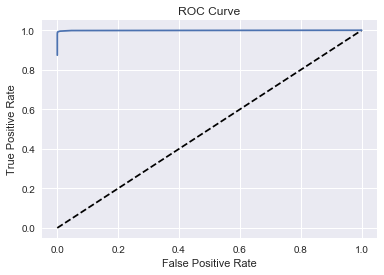

In [556]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [564]:
# feature importance
rf_features = pd.DataFrame({'features': X.columns, 'importance': 
                            rf.feature_importances_})[['features', 'importance']]

# top 10 most predictive features
rf_features.sort_values('importance', ascending=False)[:10]

,features,importance
29,recoveries,0.196586
30,collection_recovery_fee,0.153424
24,total_pymnt,0.141504
26,total_rec_prncp,0.141171
0,funded_amnt,0.079624
31,last_pymnt_amnt,0.071443
3,installment,0.055682
25,total_pymnt_inv,0.044804
27,total_rec_int,0.034419
2,int_rate,0.017179


#### Logistic Regression

In [558]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print('Accuracy Score', logreg.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.815096119825
[[69055   173]
 [15505    57]]
             precision    recall  f1-score   support

          0       0.82      1.00      0.90     69228
          1       0.25      0.00      0.01     15562

avg / total       0.71      0.82      0.73     84790



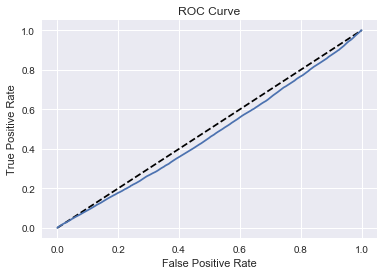

In [559]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [565]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

logreg.fit(x_train_res, y_train_res)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[[  179 69049]
 [   62 15500]]
             precision    recall  f1-score   support

          0       0.74      0.00      0.01     69228
          1       0.18      1.00      0.31     15562

avg / total       0.64      0.18      0.06     84790



In [568]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]

early_stopping_monitor = EarlyStopping(patience=2)

# Set up predictor and target variables
predictors = np.array(X)
target = to_categorical(y)

# Set up the model
model = Sequential()

# Add the layers
model.add(Dense(26, activation='relu', input_shape=(n_cols,), kernel_initializer='uniform'))
model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
#model.add(Dense(1, activation='sigmo', kernel_initializer='uniform'))


# Add the output layer
model.add(Dense(2, activation='softmax', kernel_initializer='uniform'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, validation_split=0.3,
          epochs=20, callbacks = [early_stopping_monitor])

Train on 179857 samples, validate on 77082 samples
Epoch 1/20
179857/179857 [==============================] - 28s 157us/step - loss: 4.2288 - acc: 0.7376 - val_loss: 2.9517 - val_acc: 0.8169
Epoch 2/20
179857/179857 [==============================] - 27s 153us/step - loss: 2.9674 - acc: 0.8159 - val_loss: 2.9517 - val_acc: 0.8169
Epoch 3/20
179857/179857 [==============================] - 27s 150us/step - loss: 2.9674 - acc: 0.8159 - val_loss: 2.9517 - val_acc: 0.8169
